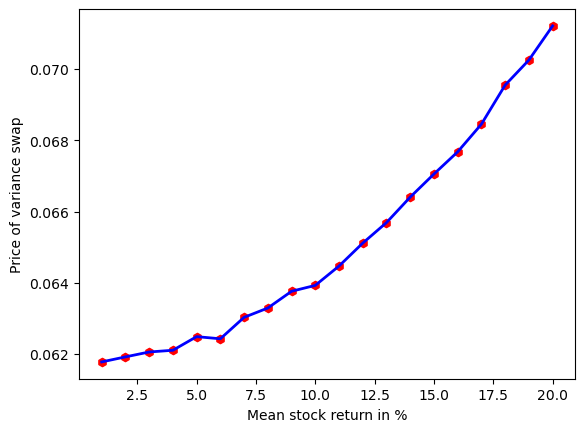

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Initializing the values of S,T,r,sig
S = 50
T = 0.25
r = 0.06
sig = 0.25

# Initializing the price list
price = []

# Consider 20 different mean returns
for j in range(1, 21):
    
    # The mean return of the stock price
    mu = 0.1*j
    
    # Number of the stock price simulations for each j
    N = 10000
    
    # Initializing the variance swap list
    varswap = np.zeros(N)
    
    # Simulate the random path for the stock many times
    for rep in range(N):
        
        # Initializing the path of the stock price
        s = np.zeros(101)
        s[0] = S
        
        # Stock price simulation and payoff calculation
        M = 100 # We split time to maturity T into M equal intervals
        t = T/M # delta from lecture
        ret = np.zeros(M-1)
        for i in range(1, M):
            # Stock price follows geometric Brownian motion
            s[i] = s[i-1] + r*s[i-1]*t + sig*s[i-1]*np.sqrt(t)*np.random.normal()
            
            # The realised return - mean stock return squared, sigma^2_{t_1}*delta from lecture
            ret[i-1] = ((s[i] - s[i-1])/s[i-1] - mu*t)**2
        
        # The variance of the stock for this simulation
        varswap[rep] = np.sum(ret)/T
    
    # The price of the variance swap given j is equal to the average of the simulated variance, i.e., the expectation of the variance
    price.append(np.mean(varswap))

# Plotting the price of variance swap against the mean return of the stock
plt.plot(range(1, len(price)+1), price, 'b', linewidth=2)
plt.scatter(range(1, len(price)+1), price, marker='h', facecolors='r')
plt.xlabel('Mean stock return in %')
plt.ylabel('Price of variance swap')
plt.show()
